In [5]:
import numpy as np
import tensorflow.keras as tk
import keras.datasets as ds
from keras import layers
from datetime import datetime

In [6]:
num_classes = 10

In [7]:
input_shape = (28, 28, 1)

In [8]:
mnist = tk.datasets.mnist

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
import matplotlib.pyplot as plt

In [12]:
import keras

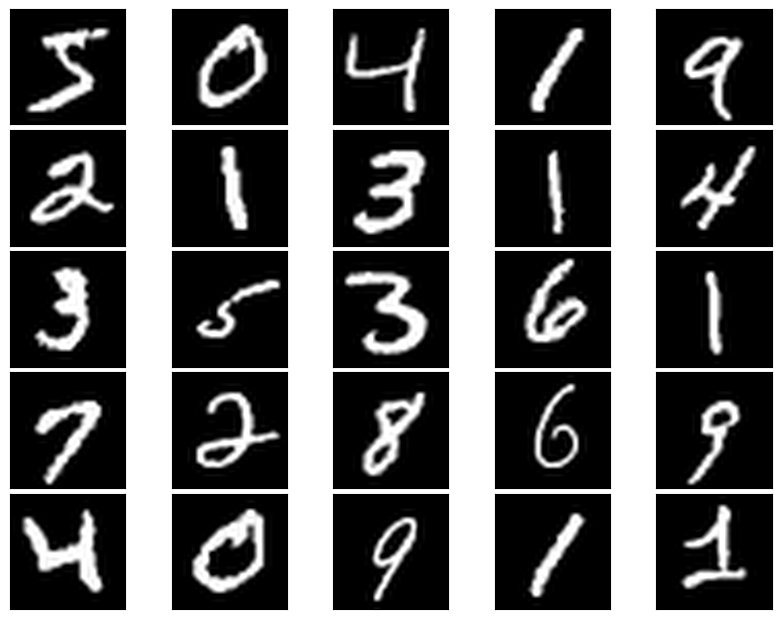

In [13]:
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.gray, interpolation='lanczos')

In [14]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [16]:
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)

In [17]:
modelo = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size = (3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation = "softmax")
    ]
)

print(modelo.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)             

In [20]:
batch_size = 128
epochs = 20
modelo.compile(loss="categorical_crossentropy", optimizer="Adadelta", metrics=["accuracy"])
modelo.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.1434 - val_accuracy: 0.9883
Epoch 2/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.1427 - val_accuracy: 0.9883
Epoch 3/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.1419 - val_accuracy: 0.9883
Epoch 4/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.1412 - val_accuracy: 0.9888
Epoch 5/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.1405 - val_accuracy: 0.9888
Epoch 6/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.1399 - val_accuracy: 0.9888
Epoch 7/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1393 - val_accuracy: 0.9888

In [21]:
score = modelo.evaluate(X_test, y_test)
print('Erro no teste: ', round(score[0],5))
print('Acurácia no teste: ', round(score[1],5))

313/313 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9874
Erro no teste:  0.12763
Acurácia no teste:  0.9874


In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [46]:
path = 'E:/Harley/visao_am/imagens_cifar_teste/'

In [24]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 253s 1us/step


In [25]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [33]:
modelo = Sequential(
    [
        Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation = 'relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation = 'relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10)
    ])

In [35]:
modelo.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [36]:
history = modelo.fit(train_images, train_labels, epochs = 20,
                     validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5233 - accuracy: 0.4443 - val_loss: 1.2278 - val_accuracy: 0.5594
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1506 - accuracy: 0.5937 - val_loss: 1.0751 - val_accuracy: 0.6258
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9874 - accuracy: 0.6523 - val_loss: 0.9859 - val_accuracy: 0.6578
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8740 - accuracy: 0.6931 - val_loss: 0.8916 - val_accuracy: 0.6902
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7967 - accuracy: 0.7217 - val_loss: 0.9287 - val_accuracy: 0.6801
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7353 - accuracy: 0.7446 - val_loss: 0.8595 - val_accuracy: 0.7106
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6835 - accuracy: 0.7615 - val_loss: 0.8680 - val_accurac

In [37]:
modelo.save(path + 'treino_cifar10_20epochs.keras')

In [71]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

**Ler modelo salvo**

In [39]:
carga_modelo = tf.keras.models.load_model(path + 'treino_cifar10_20epochs.keras')

In [43]:
def preprocessa_imagem(imagem):
    img = image.load_img(imagem, target_size=(32, 32))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor /= 255.0
    return img_tensor

In [97]:
imagem = path + 'lobisomem.jfif'

In [98]:
imagem_tensor = preprocessa_imagem(imagem)

In [99]:
predictions = carga_modelo.predict(imagem_tensor)
resultado_classe = np.argmax(predictions[0])
print('Classe predita: ', resultado_classe)

1/1 [==============================] - 0s 31ms/step
Classe predita:  4


In [100]:
classes = ['aiplane', 'automobile', 'bird', 'cat', 'derr', 'dog', 'frog', 'horse', 'ship', 'truck',]

In [101]:
print('Classe predita: ', classes[resultado_classe])

Classe predita:  derr


In [69]:
history = modelo.fit(train_images, train_labels, epochs = 50, batch_size = 256,
                     validation_data=(test_images, test_labels))

Epoch 1/50
196/196 [==============================] - 7s 35ms/step - loss: 0.1452 - accuracy: 0.9539 - val_loss: 1.2633 - val_accuracy: 0.7211
Epoch 2/50
196/196 [==============================] - 7s 34ms/step - loss: 0.1082 - accuracy: 0.9679 - val_loss: 1.3202 - val_accuracy: 0.7232
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 0.0957 - accuracy: 0.9731 - val_loss: 1.3630 - val_accuracy: 0.7223
Epoch 4/50
196/196 [==============================] - 7s 34ms/step - loss: 0.0854 - accuracy: 0.9768 - val_loss: 1.4003 - val_accuracy: 0.7223
Epoch 5/50
196/196 [==============================] - 7s 34ms/step - loss: 0.0775 - accuracy: 0.9796 - val_loss: 1.4496 - val_accuracy: 0.7205
Epoch 6/50
196/196 [==============================] - 7s 34ms/step - loss: 0.0706 - accuracy: 0.9823 - val_loss: 1.5076 - val_accuracy: 0.7185
Epoch 7/50
196/196 [==============================] - 7s 36ms/step - loss: 0.0633 - accuracy: 0.9855 - val_loss: 1.5486 - val_accuracy: 0.7185

In [70]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [102]:
from tensorflow.keras.applications import ResNet50

**Tentativa de modelo resnet com top**

In [111]:
modelo_resnet = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

102967424/102967424 [==============================] - 154s 1us/step


In [132]:
def preprocessa_imagem_resnet(imagem):
    img = image.load_img(imagem, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor /= 255.0
    return img_tensor

In [136]:
imagem = path + 'cat1.jfif'

In [137]:
imagem_tensor1 = preprocessa_imagem_resnet(imagem)

In [139]:
predictions = modelo_resnet.predict(imagem_tensor1)
resultado_classe = np.argmax(predictions[0])
print('Classe predita: ', resultado_classe)

1/1 [==============================] - 0s 83ms/step
Classe predita:  111


**Modelo Resnet sem TOP**

In [150]:
modelo_resnet_semtop = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [156]:
for layer in modelo_resnet_semtop.layers:
    layer.trainable = False

In [185]:
num_classes = 2

In [186]:
from tensorflow.keras import layers, models

modelo_base = models.Sequential()
modelo_base.add(modelo_resnet_semtop)
modelo_base.add(layers.GlobalAveragePooling2D())
modelo_base.add(layers.Dense(1024, activation = 'relu'))
modelo_base.add(layers.Dropout(0.5))
modelo_base.add(layers.Dense(num_classes, activation = 'softmax'))

modelo_base.trainable = False

In [187]:
modelo_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [188]:
path ='E:/Harley/visao_am/potatochips/potato_chips/'

In [189]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [190]:
train_datagen = ImageDataGenerator(
                                    rescale=0.255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2)

In [191]:
train_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 616 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [192]:
history = modelo_base.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
19/19 [==============================] - 49s 2s/step - loss: 0.9704 - accuracy: 0.5325 - val_loss: 0.8636 - val_accuracy: 0.5391
Epoch 2/10
19/19 [==============================] - 43s 2s/step - loss: 0.9846 - accuracy: 0.5428 - val_loss: 0.8682 - val_accuracy: 0.5469
Epoch 3/10
19/19 [==============================] - 43s 2s/step - loss: 0.9811 - accuracy: 0.5428 - val_loss: 0.8927 - val_accuracy: 0.5156
Epoch 4/10
19/19 [==============================] - 44s 2s/step - loss: 1.0151 - accuracy: 0.5000 - val_loss: 0.8980 - val_accuracy: 0.5156
Epoch 5/10
19/19 [==============================] - 44s 2s/step - loss: 0.9651 - accuracy: 0.5325 - val_loss: 0.8702 - val_accuracy: 0.5156
Epoch 6/10
19/19 [==============================] - 44s 2s/step - loss: 0.9493 - accuracy: 0.5291 - val_loss: 0.8604 - val_accuracy: 0.5156
Epoch 7/10
19/19 [==============================] - 44s 2s/step - loss: 0.9751 - accuracy: 0.5205 - val_loss: 0.9012 - val_accuracy: 0.5234
Epoch 8/10
19/19 [==

**Tentativa com modelo Mobile Net**

In [194]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [195]:
path ='E:/Harley/visao_am/potatochips/potato_chips/'

In [196]:
train_datagen = ImageDataGenerator(
                                    rescale=0.255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 616 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [198]:
modelo_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 [==============================] - 5s 0us/step


In [199]:
modelo_base_mob = Sequential([
    modelo_base,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

modelo_base.trainable=False

In [201]:
modelo_base_mob.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [202]:
history = modelo_base_mob.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
19/19 [==============================] - 36s 2s/step - loss: 1.1141 - accuracy: 0.6712 - val_loss: 0.2367 - val_accuracy: 0.8906
Epoch 2/10
19/19 [==============================] - 33s 2s/step - loss: 0.2045 - accuracy: 0.9212 - val_loss: 0.1374 - val_accuracy: 0.9375
Epoch 3/10
19/19 [==============================] - 33s 2s/step - loss: 0.1580 - accuracy: 0.9298 - val_loss: 0.1914 - val_accuracy: 0.9141
Epoch 4/10
19/19 [==============================] - 34s 2s/step - loss: 0.1414 - accuracy: 0.9490 - val_loss: 0.1211 - val_accuracy: 0.9531
Epoch 5/10
19/19 [==============================] - 33s 2s/step - loss: 0.1019 - accuracy: 0.9606 - val_loss: 0.0654 - val_accuracy: 0.9766
Epoch 6/10
19/19 [==============================] - 33s 2s/step - loss: 0.1202 - accuracy: 0.9538 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 7/10
19/19 [==============================] - 32s 2s/step - loss: 0.0913 - accuracy: 0.9658 - val_loss: 0.1019 - val_accuracy: 0.9609
Epoch 8/10
19/19 [==

In [203]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [208]:
test_generator = train_datagen.flow_from_directory(
    path + 'Test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)


Found 176 images belonging to 2 classes.


In [209]:
test_loss, test_accuracy = modelo_base_mob.evaluate(test_generator)

6/6 [==============================] - 8s 1s/step - loss: 0.0347 - accuracy: 0.9830


In [211]:
modelo_base_mob.save(path + 'mobilenet_10epoch.keras')